#Self Organizing Map

##Install MiniSom Package

In [44]:
!pip install MiniSom

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the libraries


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Importing the dataset

In [51]:
#dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hybrid/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [52]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)


##Training the SOM


In [53]:
som = MiniSom(x=10, y=10, input_len= len(X[0]), sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


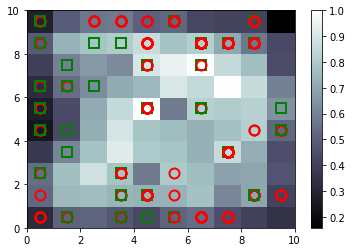

In [54]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [55]:
  mappings = som.win_map(X)
# The mappings below depends on the highest MID (Mean interneuron distance)
frauds = np.concatenate((mappings[(4,5)], mappings[(6,7)], mappings[(4,7)], mappings[(7,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [56]:
# matrix of features
customers = dataset.iloc[:, 1:].values

In [57]:
# Create dependent variables
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1  

## Create ANN


In [61]:
sc = StandardScaler()
customers = sc.fit_transform(customers)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=1, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy", metrics = ['accuracy'])

## Training ANN


In [66]:
ann.fit(customers, is_fraud, batch_size=1, epochs=30)

Epoch 1/30
690/690 [==============================] - 1s 964us/step - loss: 0.2696 - accuracy: 0.8783
Epoch 2/30
690/690 [==============================] - 1s 919us/step - loss: 0.2517 - accuracy: 0.8783
Epoch 3/30
690/690 [==============================] - 1s 960us/step - loss: 0.2373 - accuracy: 0.8783
Epoch 4/30
690/690 [==============================] - 1s 976us/step - loss: 0.2250 - accuracy: 0.8783
Epoch 5/30
690/690 [==============================] - 1s 943us/step - loss: 0.2145 - accuracy: 0.8783
Epoch 6/30
690/690 [==============================] - 1s 968us/step - loss: 0.2051 - accuracy: 0.8783
Epoch 7/30
690/690 [==============================] - 1s 1ms/step - loss: 0.1981 - accuracy: 0.8783
Epoch 8/30
690/690 [==============================] - 1s 935us/step - loss: 0.1910 - accuracy: 0.8783
Epoch 9/30
690/690 [==============================] - 1s 953us/step - loss: 0.1859 - accuracy: 0.8783
Epoch 10/30
690/690 [==============================] - 1s 927us/step - loss: 0.1818 

## Predicting test set results

In [75]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [72]:
print(y_pred)

[[1.55941330e+07 1.15445660e-10]
 [1.57997850e+07 1.40623568e-10]
 [1.57355720e+07 4.18803103e-10]
 ...
 [1.57053790e+07 5.63103080e-01]
 [1.57525780e+07 5.63103080e-01]
 [1.56729120e+07 5.63103080e-01]]
